In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline


In [2]:
a = pd.read_csv('data/authors/train.zip')

In [3]:
a

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


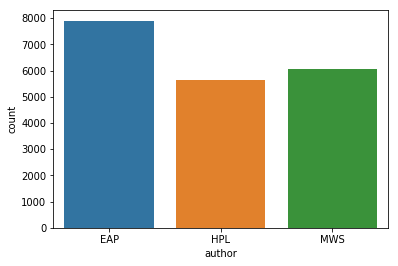

In [5]:
sns.countplot(data=a, x='author')

In [8]:
a['author_num'] = a.author.map({'EAP':0, 'HPL':1, 'MWS':2})

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a.text, a.author_num, test_size=0.3, random_state=42)

In [146]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from nltk.corpus import stopwords
#import nltk
#nltk.download('stopwords')
cv = CountVectorizer(lowercase=True, token_pattern=r'\w+|\,', ngram_range=(1, 2))#,stop_words=set(stopwords.words('english')))
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w+|\\,', tokenizer=None,
        vocabulary=None)

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1)

In [138]:
from sklearn.pipeline import make_pipeline
p = make_pipeline(cv, lr)

In [139]:
p.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [140]:
p.score(x_train, y_train), p.score(x_test, y_test)

(0.99978110178766877, 0.82465100442628536)

In [141]:
from sklearn.cross_validation import cross_val_score
lr_cvs = cross_val_score(p, a.text, a.author_num, cv=5)

In [108]:
lr_cvs.mean()

0.8243019371031769

In [145]:
cross_val_score(p, a.text, a.author_num, 
                cv=5, n_jobs=3, scoring='neg_log_loss')

array([-0.44111393, -0.44383771, -0.45265346, -0.43698719, -0.42451645])

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

h_p = make_pipeline(TfidfVectorizer(lowercase=True, ngram_range=(1,2)),
                    MultinomialNB(alpha=0.01))

In [214]:
cross_val_score(h_p, a.text, a.author_num, 
                cv=3, n_jobs=3, scoring='neg_log_loss')

array([-0.39910294, -0.40037866, -0.40848202])

In [241]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

rf_p = make_pipeline(CountVectorizer(lowercase=True, ngram_range=(1,1)),
                     StandardScaler(with_mean=False),
                     SVC(kernel='linear', C=1))

In [ ]:
cross_val_score(rf_p, a.text, a.author_num, 
                cv=3, n_jobs=3, scoring='neg_log_loss')

/home/nbabulkov/.virtualenvs/ai-venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbabulkov/.virtualenvs/ai-venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbabulkov/.virtualenvs/ai-venv/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
from sklearn.ensemble import VotingClassifier
v_c = VotingClassifier(estimators=[p, h_p, rf_p], voting='hard')
cross_val_score(v_C, a.text, a.author_num, 
                cv=3, n_jobs=3, scoring='neg_log_loss')